In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "all_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

32it [00:00, 312.27it/s]

62it [00:00, 284.46it/s]

101it [00:00, 308.52it/s]

140it [00:00, 329.15it/s]

180it [00:00, 345.89it/s]

220it [00:00, 359.00it/s]

259it [00:00, 367.75it/s]

299it [00:00, 374.57it/s]

339it [00:00, 379.76it/s]

379it [00:01, 383.57it/s]

418it [00:01, 382.47it/s]

457it [00:01, 383.20it/s]

496it [00:01, 366.43it/s]

535it [00:01, 372.35it/s]

574it [00:01, 375.94it/s]

613it [00:01, 379.52it/s]

653it [00:01, 383.05it/s]

693it [00:01, 387.53it/s]

732it [00:01, 386.51it/s]

771it [00:02, 372.45it/s]

809it [00:02, 373.40it/s]

847it [00:02, 373.08it/s]

885it [00:02, 373.18it/s]

924it [00:02, 376.62it/s]

962it [00:02, 376.30it/s]

1001it [00:02, 378.37it/s]

1039it [00:02, 376.11it/s]

1079it [00:02, 380.99it/s]

1118it [00:02, 383.49it/s]

1157it [00:03, 384.87it/s]

1196it [00:03, 376.74it/s]

1236it [00:03, 380.85it/s]

1275it [00:03, 382.71it/s]

1315it [00:03, 384.80it/s]

1354it [00:03, 384.09it/s]

1393it [00:03, 383.49it/s]

1432it [00:03, 361.86it/s]

1471it [00:03, 368.43it/s]

1510it [00:04, 373.71it/s]

1549it [00:04, 378.32it/s]

1589it [00:04, 381.80it/s]

1628it [00:04, 381.67it/s]

1668it [00:04, 384.19it/s]

1708it [00:04, 386.18it/s]

1747it [00:04, 385.74it/s]

1786it [00:04, 386.99it/s]

1826it [00:04, 388.17it/s]

1866it [00:04, 388.84it/s]

1905it [00:05, 387.08it/s]

1944it [00:05, 386.99it/s]

1984it [00:05, 388.28it/s]

2023it [00:05, 379.49it/s]

2061it [00:05, 352.88it/s]

2100it [00:05, 361.79it/s]

2139it [00:05, 368.79it/s]

2178it [00:05, 374.51it/s]

2217it [00:05, 378.99it/s]

2256it [00:05, 381.20it/s]

2295it [00:06, 383.39it/s]

2335it [00:06, 385.73it/s]

2374it [00:06, 378.90it/s]

2413it [00:06, 380.59it/s]

2452it [00:06, 382.19it/s]

2492it [00:06, 384.25it/s]

2531it [00:06, 384.15it/s]

2570it [00:06, 380.18it/s]

2610it [00:06, 384.25it/s]

2649it [00:07, 383.69it/s]

2689it [00:07, 386.18it/s]

2728it [00:07, 386.56it/s]

2767it [00:07, 386.99it/s]

2807it [00:07, 387.95it/s]

2846it [00:07, 387.91it/s]

2886it [00:07, 389.07it/s]

2925it [00:07, 388.63it/s]

2964it [00:07, 388.75it/s]

3003it [00:07, 388.00it/s]

3042it [00:08, 388.09it/s]

3082it [00:08, 388.98it/s]

3122it [00:08, 390.09it/s]

3162it [00:08, 386.87it/s]

3201it [00:08, 387.65it/s]

3240it [00:08, 387.30it/s]

3280it [00:08, 389.40it/s]

3319it [00:08, 389.32it/s]

3358it [00:08, 365.78it/s]

3396it [00:08, 369.21it/s]

3434it [00:09, 366.35it/s]

3473it [00:09, 372.03it/s]

3512it [00:09, 377.05it/s]

3551it [00:09, 380.43it/s]

3590it [00:09, 372.85it/s]

3629it [00:09, 375.15it/s]

3667it [00:09, 372.89it/s]

3706it [00:09, 375.24it/s]

3745it [00:09, 378.93it/s]

3783it [00:09, 377.70it/s]

3821it [00:10, 376.56it/s]

3859it [00:10, 369.51it/s]

3897it [00:10, 371.33it/s]

3936it [00:10, 374.65it/s]

3975it [00:10, 377.48it/s]

4014it [00:10, 380.09it/s]

4053it [00:10, 382.67it/s]

4092it [00:10, 384.69it/s]

4131it [00:10, 385.45it/s]

4170it [00:11, 263.85it/s]

4209it [00:11, 292.00it/s]

4248it [00:11, 315.69it/s]

4287it [00:11, 334.79it/s]

4326it [00:11, 349.51it/s]

4365it [00:11, 359.88it/s]

4404it [00:11, 367.65it/s]

4444it [00:11, 373.57it/s]

4483it [00:11, 373.91it/s]

4522it [00:12, 377.54it/s]

4561it [00:12, 379.27it/s]

4600it [00:12, 382.35it/s]

4639it [00:12, 384.54it/s]

4679it [00:12, 386.16it/s]

4718it [00:12, 385.55it/s]

4736it [00:12, 374.95it/s]


0it [00:00, ?it/s]

41it [00:00, 402.67it/s]

74it [00:00, 377.02it/s]

112it [00:00, 374.87it/s]

151it [00:00, 376.78it/s]

192it [00:00, 383.67it/s]

232it [00:00, 388.36it/s]

273it [00:00, 393.02it/s]

314it [00:00, 396.72it/s]

355it [00:00, 398.56it/s]

396it [00:01, 400.14it/s]

437it [00:01, 400.84it/s]

477it [00:01, 387.20it/s]

516it [00:01, 371.99it/s]

556it [00:01, 379.56it/s]

597it [00:01, 386.32it/s]

638it [00:01, 392.28it/s]

678it [00:01, 394.53it/s]

719it [00:01, 397.36it/s]

760it [00:01, 399.55it/s]

800it [00:02, 399.63it/s]

840it [00:02, 381.97it/s]

880it [00:02, 386.63it/s]

919it [00:02, 385.14it/s]

960it [00:02, 390.65it/s]

1000it [00:02, 393.37it/s]

1040it [00:02, 395.25it/s]

1080it [00:02, 396.27it/s]

1120it [00:02, 395.62it/s]

1161it [00:03, 342.51it/s]

1202it [00:03, 359.84it/s]

1242it [00:03, 370.77it/s]

1283it [00:03, 380.35it/s]

1324it [00:03, 386.16it/s]

1365it [00:03, 391.78it/s]

1405it [00:03, 392.69it/s]

1445it [00:03, 394.78it/s]

1486it [00:03, 396.40it/s]

1527it [00:03, 398.65it/s]

1568it [00:04, 400.19it/s]

1609it [00:04, 398.99it/s]

1650it [00:04, 401.12it/s]

1691it [00:04, 403.36it/s]

1732it [00:04, 405.03it/s]

1773it [00:04, 406.39it/s]

1814it [00:04, 406.22it/s]

1855it [00:04, 404.92it/s]

1896it [00:04, 404.73it/s]

1937it [00:04, 372.94it/s]

1978it [00:05, 382.55it/s]

2020it [00:05, 390.43it/s]

2061it [00:05, 394.25it/s]

2101it [00:05, 395.39it/s]

2142it [00:05, 398.18it/s]

2183it [00:05, 401.51it/s]

2224it [00:05, 403.94it/s]

2265it [00:05, 405.64it/s]

2306it [00:05, 406.58it/s]

2348it [00:05, 407.71it/s]

2389it [00:06, 406.83it/s]

2430it [00:06, 407.45it/s]

2471it [00:06, 398.62it/s]

2511it [00:06, 391.75it/s]

2551it [00:06, 383.74it/s]

2592it [00:06, 391.13it/s]

2632it [00:06, 364.72it/s]

2673it [00:06, 375.78it/s]

2714it [00:06, 384.26it/s]

2756it [00:07, 393.24it/s]

2798it [00:07, 399.63it/s]

2839it [00:07, 401.79it/s]

2881it [00:07, 404.15it/s]

2922it [00:07, 405.88it/s]

2964it [00:07, 407.53it/s]

3006it [00:07, 409.33it/s]

3047it [00:07, 408.61it/s]

3089it [00:07, 410.03it/s]

3131it [00:07, 410.65it/s]

3173it [00:08, 402.95it/s]

3215it [00:08, 406.72it/s]

3257it [00:08, 408.80it/s]

3298it [00:08, 409.09it/s]

3339it [00:08, 409.32it/s]

3381it [00:08, 411.39it/s]

3423it [00:08, 393.96it/s]

3465it [00:08, 400.35it/s]

3507it [00:08, 404.14it/s]

3548it [00:09, 392.34it/s]

3590it [00:09, 397.85it/s]

3631it [00:09, 401.21it/s]

3672it [00:09, 384.57it/s]

3711it [00:09, 384.04it/s]

3753it [00:09, 391.93it/s]

3794it [00:09, 395.44it/s]

3835it [00:09, 399.51it/s]

3876it [00:09, 401.97it/s]

3917it [00:09, 404.34it/s]

3958it [00:10, 405.65it/s]

4000it [00:10, 407.09it/s]

4041it [00:10, 406.31it/s]

4082it [00:10, 401.85it/s]

4124it [00:10, 405.66it/s]

4165it [00:10, 406.93it/s]

4206it [00:10, 407.00it/s]

4247it [00:10, 406.89it/s]

4289it [00:10, 409.69it/s]

4331it [00:10, 412.34it/s]

4373it [00:11, 395.41it/s]

4413it [00:11, 387.73it/s]

4452it [00:11, 362.97it/s]

4493it [00:11, 373.96it/s]

4534it [00:11, 381.72it/s]

4575it [00:11, 388.39it/s]

4615it [00:11, 391.25it/s]

4656it [00:11, 395.79it/s]

4697it [00:11, 399.32it/s]

4736it [00:11, 394.99it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


/home/cz136/anaconda3/envs/balrog/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_ylim(-0.020,0.020)
    plt.show()
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

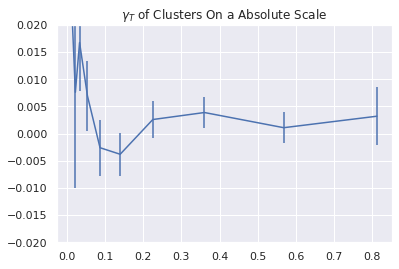

[-1.9716e-02 -1.8110e+00 -1.2977e+01 -9.2621e+00  5.9920e+00  1.5374e+01
 -1.5138e+01 -2.9711e+01 -8.3751e+00 -6.2454e+00]
------------------------------------------------------------------------------
[-4.1936e+00 -9.0309e+02 -2.6320e+03 -3.9039e+03 -5.6254e+03 -7.9541e+03
 -8.7285e+03 -7.8282e+03 -4.3770e+03 -4.0717e+02]
------------------------------------------------------------------------------
[1.000e+00 2.380e+02 7.750e+02 1.339e+03 2.304e+03 4.042e+03 5.856e+03
 7.670e+03 7.738e+03 1.955e+03]
------------------------------------------------------------------------------
[-0.0197 -0.0076 -0.0167 -0.0069  0.0026  0.0038 -0.0026 -0.0039 -0.0011
 -0.0032]
------------------------------------------------------------------------------
[-4.1936 -3.7945 -3.3961 -2.9155 -2.4416 -1.9679 -1.4905 -1.0206 -0.5657
 -0.2083]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

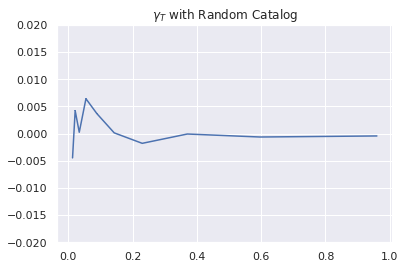

[-4.4708e-03  4.2146e-03  2.4532e-04  6.4103e-03  3.6750e-03  1.3263e-04
 -1.7934e-03 -8.1019e-05 -6.3031e-04 -4.3576e-04]
[ 6.4965e-05 -6.1242e-05 -3.5648e-06 -9.3148e-05 -5.3402e-05 -1.9273e-06
  2.6060e-05  1.1773e-06  9.1590e-06  6.3320e-06]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

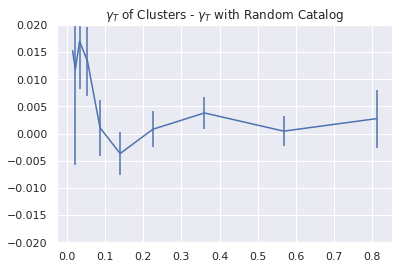

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

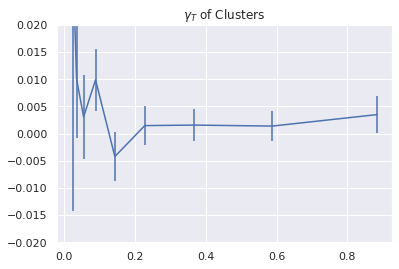

[  0.      -1.4289  -5.3477  -3.142  -17.5867  13.0959  -7.244  -10.8942
 -11.5194 -18.1063]
------------------------------------------------------------------------------
[    0.      -157.7881 -1791.3528 -2965.7043 -4317.5704 -6032.252
 -7308.3494 -6999.8986 -4441.3485  -643.3478]
------------------------------------------------------------------------------
[   0.   42.  533. 1020. 1779. 3101. 4935. 6970. 8350. 5188.]
------------------------------------------------------------------------------
[    nan -0.034  -0.01   -0.0031 -0.0099  0.0042 -0.0015 -0.0016 -0.0014
 -0.0035]
------------------------------------------------------------------------------
[    nan -3.7569 -3.3609 -2.9076 -2.427  -1.9453 -1.4809 -1.0043 -0.5319
 -0.124 ]
------------------------------------------------------------------------------


In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters ")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)